In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plot
import tensorflow as tf

In [2]:
minst = tf.keras.datasets.mnist
(x_train,y_train), (x_test, y_test) = minst.load_data()

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x_train,y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2636 - accuracy: 0.9230
Epoch 2/4
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1098 - accuracy: 0.9665
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0746 - accuracy: 0.9761
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0543 - accuracy: 0.9825


In [7]:
model.save('DigitRecogniser.model')

INFO:tensorflow:Assets written to: DigitRecogniser.model\assets


INFO:tensorflow:Assets written to: DigitRecogniser.model\assets


In [8]:
loss, accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 906us/step - loss: 0.0958 - accuracy: 0.9710


In [9]:
print(f'loss: {loss}, accuracy: {accuracy}') 

loss: 0.09584290534257889, accuracy: 0.9710000157356262


1/1 [==============================] - 0s 61ms/step
number is probably 3
1/1 [==============================] - 0s 20ms/step
number is probably 3
1/1 [==============================] - 0s 8ms/step
number is probably 7


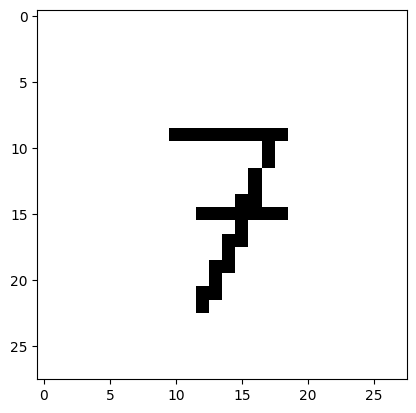

In [10]:
img = 1

while os.path.isfile(f"Digits/Digit{img}.png"):
    try:
        image = cv2.imread(f"Digits/Digit{img}.png")[:,:,0]
        image = np.invert(np.array([image]))
        prediction = model.predict(image)
        print(f"number is probably {np.argmax(prediction)}")
        plot.imshow(image[0],cmap=plot.cm.binary)
        plot.show
    except:
        print("Error!")
    finally:
        img += 1
                

In [11]:
def update_model(model, new_data, labels):
    new_data = tf.keras.utils.normalize(new_data, axis=1)
    model.fit(new_data, labels, epochs=4)

1/1 [==============================] - 0s 389us/step
number is probably 3


<function matplotlib.pyplot.show(close=None, block=None)>

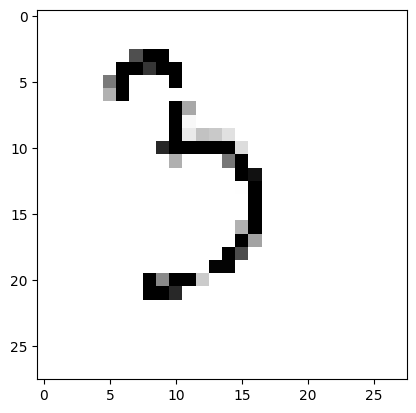

In [14]:
image = cv2.imread(f"Digits/Digit5.png")[:,:,0]
image = np.invert(np.array([image]))
prediction = model.predict(image)
print(f"number is probably {np.argmax(prediction)}")
plot.imshow(image[0],cmap=plot.cm.binary)
plot.show

In [13]:
correct_label = int(input("Enter the correct label for the digit: "))

        # Update the model with the new data
update_model(model, image, np.array([correct_label]))

Epoch 1/4
1/1 [==============================] - 0s 215ms/step - loss: 2.4491 - accuracy: 0.0000e+00
Epoch 2/4
1/1 [==============================] - 0s 0s/step - loss: 0.3017 - accuracy: 1.0000
Epoch 3/4
1/1 [==============================] - 0s 0s/step - loss: 0.0192 - accuracy: 1.0000
Epoch 4/4
1/1 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000


In [16]:
model_path = 'DigitRecogniser.model'

model.save(model_path)

INFO:tensorflow:Assets written to: DigitRecogniser.model\assets


INFO:tensorflow:Assets written to: DigitRecogniser.model\assets
